In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [26]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [28]:
data.head(5)

,BuyingPrice,MaintCost,NumDoors,Capacity,BootSize,SafetyLevel,CarAcceptable
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree





    


In [33]:
print(data['Capacity'].unique())


['2' '4' 'more']


**Here's a list of only the topics/steps:**

1. Import Required Libraries
2. Load and Explore the Dataset
3. Rename Columns (if needed)
4. Encode Categorical Features using LabelEncoder
5. Split Dataset into Input (X) and Target (y)
6. Train-Test SplitTrain Decision Tree Model
7. Take User Input from Console
8. Encode User Input
9. Make Prediction
10. Display Prediction Result
11. Loop Until User Exits

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd

data=pd.read_csv("/kaggle/input/car-evaluation-data-set/car_evaluation.csv")


data.rename(columns={"vhigh":'BuyingPrice', "vhigh.1":'MaintCost', "2":'NumDoors', "2.1":'Capacity',
            "small":'BootSize', "low":'SafetyLevel',"unacc":'CarAcceptable'},inplace=True)

le_BuyingPrice=LabelEncoder()
le_MaintCost=LabelEncoder()
le_NumDoors=LabelEncoder()
le_Capacity=LabelEncoder()
le_BootSize	=LabelEncoder()
le_SafetyLevel	=LabelEncoder()

data["BuyingPrice"]=le_BuyingPrice.fit_transform(data["BuyingPrice"])
data["MaintCost"]=le_MaintCost.fit_transform(data["MaintCost"])
data["NumDoors"]=le_NumDoors.fit_transform(data["NumDoors"])
data["Capacity"]=le_Capacity.fit_transform(data["Capacity"])
data["BootSize"]=le_BootSize.fit_transform(data["BootSize"])
data["SafetyLevel"]=le_SafetyLevel.fit_transform(data["SafetyLevel"])


X=data.drop('CarAcceptable',axis=1)
y=data["CarAcceptable"]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)


while True:
    BuyingPrice=input("high, high, med, low choose one or enter exit  :")
    if BuyingPrice.lower()=='exit':
        print("leaving......")
        break
    MaintCost=input("write high, high, med, low any :")	
    NumDoors=input("enter data like 2, 3, 4, 5-more :")
    Capacity=input("enter data like 2, 4, more :")
    BootSize=input("enter data like small, med, big :")
    SafetyLevel=input("enter data like low, med, high :")


''' yeh logic yaad rakh
machine learning model was trained on numbers, not words.
But user is giving words like "high" or "big".
So we need to convert them into the same numbers that were used during training.
That's why we use .transform() from LabelEncoder — it turns the word into the correct number.'''
    try:
        user_input=[[
            le_BuyingPrice.transform([BuyingPrice])[0],
            le_MaintCost.transform([MaintCost])[0],
            le_NumDoors.transform([NumDoors])[0],
            le_Capacity.transform([Capacity])[0],
            le_BootSize.transform([BootSize])[0],
            le_SafetyLevel.transform([SafetyLevel])[0]
        ]]
        Prediction=model.predict(user_input)
        print("Predicition",Prediction[0])
        
    except ValueError:
        print("mati khali !")
        


high, high, med, low choose one or enter exit  : low
write high, high, med, low any : med
enter data like 2, 3, 4, 5-more : 3
enter data like 2, 4, more : 4
enter data like small, med, big : big
enter data like low, med, high : high


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicition vgood


high, high, med, low choose one or enter exit  : exit


leaving......


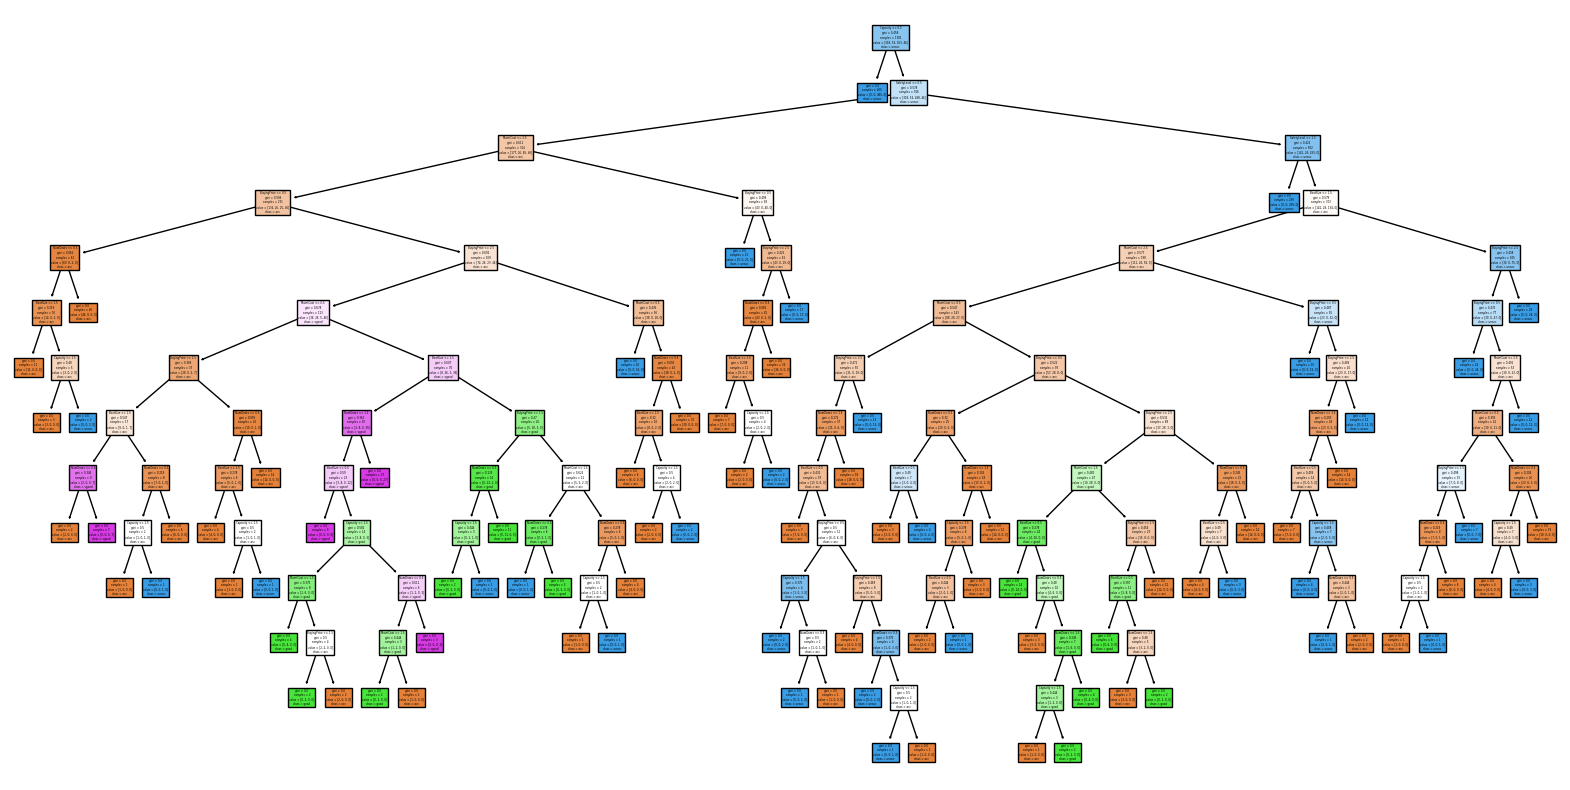

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

